# Pandas Guided Practice - Improving Store Profits

A Superstore is seeking your knowledge in understanding what works best for them. They would like you to provide a few concrete recommendations for how they can maximize their profits.

The data provided is stored in three different files inside of the `data` folder:
- `orders.csv`: General order information (date, shipping method, quantity ordered, profit, etc)
- `customers.csv`: Unique customers who placed orders to the store
- `products.csv`: Unique products ordered from the store

It covers all orders made to the Superstore over the past few years.

The original dataset can be found on [Kaggle](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)

### Tasks

There are a few high-level tasks we will need to complete:
- Formatting the data
- Cleaning the data
- Exploring what the Superstore should sell (or not sell)
- Determining what they should be selling *when*?

#### Pair Programming

There are specific instructions for completing each of these tasks below. You and a partner will be given ten minutes in a breakout room to work through each task. We recommend you both work on the same notebook by having one person share their screen. This also allows the person who is not screen sharing to do the searching on Google when necessary. After ten minutes we will get back together and work through the task as a group.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Format Data

Take a few minutes in a breakout room to format the data into a single dataframe.

Tasks:
- Begin by reading each individual file into it's own DataFrame and finding the common columns (what you will join on)
- Drop the `Unnamed: 0` column from each of the three DataFrames
- Combine `orders.csv`, `customers.csv`, and `products.csv` into a single DataFrame, `df_base`
- Create a copy of `df_base` and call it `df`. This will be the DataFrame we work with moving forward.
- Clean the column names so spaces are replaced with underscores and all text is lowercase

All three csvs are stored in the `data` folder so the path to each file will be similar (`./data/<filename>`)

In [6]:
# Your code here (add as many cells as needed)
orders = pd.read_csv('./data/orders.csv').drop('Unnamed: 0', axis=1)
orders.head()

,Order Id,Order Date,Ship Date,Ship Mode,Product Id,Customer Id,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-BO-10001798,CG-12520,$261.96,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-CH-10000454,CG-12520,$731.94,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,OFF-LA-10000240,DV-13045,$14.62,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,FUR-TA-10000577,SO-20335,$957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,OFF-ST-10000760,SO-20335,$22.368000000000002,2,0.20,2.5164


In [7]:
customers = pd.read_csv('./data/customers.csv').drop('Unnamed: 0', axis=1)
customers.head()

,Customer Id,Segment,Country,City,State,Postal Code,Region
0,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South
1,DV-13045,Corporate,United States,Los Angeles,California,90036,West
2,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South
3,BH-11710,Consumer,United States,Los Angeles,California,90032,West
4,AA-10480,Consumer,United States,Concord,North Carolina,28027,South


In [8]:
products = pd.read_csv('./data/products.csv').drop('Unnamed: 0', axis=1)
products.head()

,Product Id,Product Name,Category,Sub-Category
0,FUR-BO-10001798,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,Office Supplies,Storage


Next step is to combine the 3 dataframes into one. We can combine all three at the same time. `orders` is the main table we are using. To join `customers` we will use the `Customer Id` column found in both tables. To join the `products` table we can use the `Product Id` column.

I use a `left` join in both cases in order to preserve the missing values to practice below. An `inner` join would work here as well.

In [52]:
df_base = orders.merge(customers, on='Customer Id', how='left').merge(products, on='Product Id', how='left')
df_base.head()

,Order Id,Order Date,Ship Date,Ship Mode,Product Id,Customer Id,Sales,Quantity,Discount,Profit,Segment,Country,City,State,Postal Code,Region,Product Name,Category,Sub-Category
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-BO-10001798,CG-12520,$261.96,2,0.0,41.9136,Consumer,United States,Henderson,Kentucky,42420.0,South,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-BO-10001798,CG-12520,$261.96,2,0.0,41.9136,Consumer,United States,Houston,Texas,77070.0,Central,Bush Somerset Collection Bookcase,Furniture,Bookcases
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-BO-10001798,CG-12520,$261.96,2,0.0,41.9136,Consumer,United States,Dallas,Texas,75217.0,Central,Bush Somerset Collection Bookcase,Furniture,Bookcases
3,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-CH-10000454,CG-12520,$731.94,3,0.0,219.5820,Consumer,United States,Henderson,Kentucky,42420.0,South,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
4,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-CH-10000454,CG-12520,$731.94,3,0.0,219.5820,Consumer,United States,Houston,Texas,77070.0,Central,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs


In [22]:
df_base.shape

(74245, 19)

Create a copy using `.copy()`. This allows us to make changes to the DataFrame but we will have a "base" DataFrame to revert back to if necessary.

In [53]:
df = df_base.copy()

In [26]:
df.head()

,Order Id,Order Date,Ship Date,Ship Mode,Product Id,Customer Id,Sales,Quantity,Discount,Profit,Segment,Country,City,State,Postal Code,Region,Product Name,Category,Sub-Category
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-BO-10001798,CG-12520,$261.96,2,0.0,41.9136,Consumer,United States,Henderson,Kentucky,42420,South,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-BO-10001798,CG-12520,$261.96,2,0.0,41.9136,Consumer,United States,Houston,Texas,77070,Central,Bush Somerset Collection Bookcase,Furniture,Bookcases
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-BO-10001798,CG-12520,$261.96,2,0.0,41.9136,Consumer,United States,Dallas,Texas,75217,Central,Bush Somerset Collection Bookcase,Furniture,Bookcases
3,CA-2017-110198,5/1/2017,5/2/2017,First Class,FUR-BO-10001798,AG-10900,$314.35200000000003,3,0.2,-15.7176,Consumer,United States,Tucson,Arizona,85705,West,Bush Somerset Collection Bookcase,Furniture,Bookcases
4,CA-2017-110198,5/1/2017,5/2/2017,First Class,FUR-BO-10001798,AG-10900,$314.35200000000003,3,0.2,-15.7176,Consumer,United States,Los Angeles,California,90008,West,Bush Somerset Collection Bookcase,Furniture,Bookcases


In [54]:
# call .columns attribute to get collection of column names
df.columns

Index(['Order Id', 'Order Date', 'Ship Date', 'Ship Mode', 'Product Id',
       'Customer Id', 'Sales', 'Quantity', 'Discount', 'Profit', 'Segment',
       'Country', 'City', 'State', 'Postal Code', 'Region', 'Product Name',
       'Category', 'Sub-Category'],
      dtype='object')

In [55]:
# List comprehension to change column names
df.columns = [col.replace(' ', '_').lower() for col in df.columns]

# Alternative way
df = df.rename(columns=str.replace(' ','_').lower())

In [56]:
df.head()

,order_id,order_date,ship_date,ship_mode,product_id,customer_id,sales,quantity,discount,profit,segment,country,city,state,postal_code,region,product_name,category,sub-category
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-BO-10001798,CG-12520,$261.96,2,0.0,41.9136,Consumer,United States,Henderson,Kentucky,42420.0,South,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-BO-10001798,CG-12520,$261.96,2,0.0,41.9136,Consumer,United States,Houston,Texas,77070.0,Central,Bush Somerset Collection Bookcase,Furniture,Bookcases
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-BO-10001798,CG-12520,$261.96,2,0.0,41.9136,Consumer,United States,Dallas,Texas,75217.0,Central,Bush Somerset Collection Bookcase,Furniture,Bookcases
3,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-CH-10000454,CG-12520,$731.94,3,0.0,219.5820,Consumer,United States,Henderson,Kentucky,42420.0,South,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
4,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-CH-10000454,CG-12520,$731.94,3,0.0,219.5820,Consumer,United States,Houston,Texas,77070.0,Central,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs


## Cleaning

Now that we have combined all of our data into a single DataFrame, let's look at what data we actually have and if any cleaning is required.

- Use the `.info()` method to check the size of the DataFrame and the datatypes of each column.
- Check for [duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html) using `['order_id', 'product_id', 'customer_id']` as the `subset` of columns. 
- If any, [drop duplicate rows](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates) and [reset the index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html). 
- Convert the `sales` column to type `float64`. 
- Convert `order_date` and `ship_date` to [pandas datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)
- Show the number of missing values in each column. Filter the DataFrame to show the rows missing data. What seems to be the underlying problem?
- Drop the rows with missing values. 

**`df` should have 9970 rows when you are done**

In [57]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74261 entries, 0 to 74260
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      74261 non-null  object 
 1   order_date    74261 non-null  object 
 2   ship_date     74261 non-null  object 
 3   ship_mode     74261 non-null  object 
 4   product_id    74261 non-null  object 
 5   customer_id   74261 non-null  object 
 6   sales         74261 non-null  object 
 7   quantity      74261 non-null  int64  
 8   discount      74261 non-null  float64
 9   profit        74261 non-null  float64
 10  segment       74245 non-null  object 
 11  country       74245 non-null  object 
 12  city          74245 non-null  object 
 13  state         74245 non-null  object 
 14  postal_code   74245 non-null  float64
 15  region        74245 non-null  object 
 16  product_name  74245 non-null  object 
 17  category      74245 non-null  object 
 18  sub-category  74245 non-nu

We know from the original `orders` table that there were just below 10,000 total orders. But after merging the other two files we created quite a few duplicate entries. Let's check how many duplicates we have.

In [58]:
df.duplicated(subset=['order_id', 'product_id', 'customer_id']).sum()

64275

In [59]:
# Use .drop_duplicates with same subset to drop duplicate rows
df = df.drop_duplicates(subset=['order_id', 'product_id', 'customer_id'], ignore_index=True)
df.head()

,order_id,order_date,ship_date,ship_mode,product_id,customer_id,sales,quantity,discount,profit,segment,country,city,state,postal_code,region,product_name,category,sub-category
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-BO-10001798,CG-12520,$261.96,2,0.00,41.9136,Consumer,United States,Henderson,Kentucky,42420.0,South,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-CH-10000454,CG-12520,$731.94,3,0.00,219.5820,Consumer,United States,Henderson,Kentucky,42420.0,South,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,OFF-LA-10000240,DV-13045,$14.62,2,0.00,6.8714,Corporate,United States,Los Angeles,California,90036.0,West,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,FUR-TA-10000577,SO-20335,$957.5775,5,0.45,-383.0310,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,OFF-ST-10000760,SO-20335,$22.368000000000002,2,0.20,2.5164,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Eldon Fold 'N Roll Cart System,Office Supplies,Storage


Sanity check to make sure there are no more duplicates

In [60]:
df.duplicated(subset=['order_id', 'product_id', 'customer_id']).sum()

0

Now we need to convert some of the columns' datatypes. First converting `sales` to numeric. Before we can cast it as a float, we need to remove the `$` symbol from every value in the column.

In [61]:
df['sales'] = df['sales'].map(lambda x: x.strip('$')).astype(np.float64)
df.head()

,order_id,order_date,ship_date,ship_mode,product_id,customer_id,sales,quantity,discount,profit,segment,country,city,state,postal_code,region,product_name,category,sub-category
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-BO-10001798,CG-12520,261.9600,2,0.00,41.9136,Consumer,United States,Henderson,Kentucky,42420.0,South,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,FUR-CH-10000454,CG-12520,731.9400,3,0.00,219.5820,Consumer,United States,Henderson,Kentucky,42420.0,South,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,OFF-LA-10000240,DV-13045,14.6200,2,0.00,6.8714,Corporate,United States,Los Angeles,California,90036.0,West,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,FUR-TA-10000577,SO-20335,957.5775,5,0.45,-383.0310,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,OFF-ST-10000760,SO-20335,22.3680,2,0.20,2.5164,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Eldon Fold 'N Roll Cart System,Office Supplies,Storage


In [62]:
# Change order date and ship date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

In [63]:
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [64]:
# Check for missing values. How many in each column?
df.isna().sum()

order_id         0
order_date       0
ship_date        0
ship_mode        0
product_id       0
customer_id      0
sales            0
quantity         0
discount         0
profit           0
segment         16
country         16
city            16
state           16
postal_code     16
region          16
product_name    16
category        16
sub-category    16
dtype: int64

Look at the rows with missing values.

In [69]:
df[df['segment'].isna()]

,order_id,order_date,ship_date,ship_mode,product_id,customer_id,sales,quantity,discount,profit,segment,country,city,state,postal_code,region,product_name,category,sub-category
873,CA-2016-116736,2016-01-17,2016-01-21,Standard Class,?,?,322.590,3,0.0,64.5180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
948,US-2017-110576,2017-11-28,2017-12-02,Standard Class,?,?,15.552,3,0.2,5.4432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1023,CA-2016-126529,2016-01-11,2016-01-13,Second Class,?,?,15.552,3,0.2,5.4432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1098,CA-2016-107216,2016-06-14,2016-06-17,First Class,?,?,29.290,1,0.0,9.6657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1173,CA-2016-161207,2016-08-29,2016-09-03,Standard Class,?,?,27.930,3,0.0,8.0997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1248,CA-2017-115602,2017-12-18,2017-12-24,Standard Class,?,?,1704.560,13,0.0,511.3680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1322,US-2014-117058,2014-05-27,2014-05-30,First Class,?,?,17.460,6,0.8,-30.5550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1397,CA-2016-159212,2016-11-01,2016-11-05,Standard Class,?,?,21.800,2,0.0,6.1040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1472,CA-2016-113138,2016-11-19,2016-11-25,Standard Class,?,?,17.712,3,0.2,6.4206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1547,US-2017-124926,2017-11-13,2017-11-18,Second Class,?,?,9.324,6,0.8,-24.7086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df.shape

(9986, 19)

In [73]:
df = df.dropna()
df.head()

,order_id,order_date,ship_date,ship_mode,product_id,customer_id,sales,quantity,discount,profit,segment,country,city,state,postal_code,region,product_name,category,sub-category
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,FUR-BO-10001798,CG-12520,261.9600,2,0.00,41.9136,Consumer,United States,Henderson,Kentucky,42420.0,South,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,FUR-CH-10000454,CG-12520,731.9400,3,0.00,219.5820,Consumer,United States,Henderson,Kentucky,42420.0,South,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,OFF-LA-10000240,DV-13045,14.6200,2,0.00,6.8714,Corporate,United States,Los Angeles,California,90036.0,West,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,FUR-TA-10000577,SO-20335,957.5775,5,0.45,-383.0310,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,OFF-ST-10000760,SO-20335,22.3680,2,0.20,2.5164,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Eldon Fold 'N Roll Cart System,Office Supplies,Storage


## TIME TO EXPLORE

The Superstore wants us to provide them with some recommendations on how they can maximize their profits. For this guided practice, we want to provide some general insight into: 
- What to sell?
- When to sell *what*?

### What to sell? (Or what NOT to sell?)

Steps:
- Create a new column, `profit_per_unit`, by dividing `profit` by `quantity`
- Create a visual showing how many orders fall within each `category`
- Find the `sub-category` with the highest median `profit_per_unit` and lowest median `profit_per_unit`
- The tables sub-category has a *negative* median `profit_per_unit`. Find the total number of table orders with a negative `profit_per_unit`
- Of all table orders, what *percentage* of them had a negative `profit_per_unit`

In [74]:
# Your code here
df.head()

,order_id,order_date,ship_date,ship_mode,product_id,customer_id,sales,quantity,discount,profit,segment,country,city,state,postal_code,region,product_name,category,sub-category
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,FUR-BO-10001798,CG-12520,261.9600,2,0.00,41.9136,Consumer,United States,Henderson,Kentucky,42420.0,South,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,FUR-CH-10000454,CG-12520,731.9400,3,0.00,219.5820,Consumer,United States,Henderson,Kentucky,42420.0,South,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,OFF-LA-10000240,DV-13045,14.6200,2,0.00,6.8714,Corporate,United States,Los Angeles,California,90036.0,West,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,FUR-TA-10000577,SO-20335,957.5775,5,0.45,-383.0310,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,OFF-ST-10000760,SO-20335,22.3680,2,0.20,2.5164,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Eldon Fold 'N Roll Cart System,Office Supplies,Storage


In [76]:
# Create profit_per_unit dividing profit by quantity
df['profit_per_unit'] = df['profit'] / df['quantity']

In [77]:
df.head()

,order_id,order_date,ship_date,ship_mode,product_id,customer_id,sales,quantity,discount,profit,segment,country,city,state,postal_code,region,product_name,category,sub-category,profit_per_unit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,FUR-BO-10001798,CG-12520,261.9600,2,0.00,41.9136,Consumer,United States,Henderson,Kentucky,42420.0,South,Bush Somerset Collection Bookcase,Furniture,Bookcases,20.9568
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,FUR-CH-10000454,CG-12520,731.9400,3,0.00,219.5820,Consumer,United States,Henderson,Kentucky,42420.0,South,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,73.1940
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,OFF-LA-10000240,DV-13045,14.6200,2,0.00,6.8714,Corporate,United States,Los Angeles,California,90036.0,West,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels,3.4357
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,FUR-TA-10000577,SO-20335,957.5775,5,0.45,-383.0310,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,-76.6062
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,OFF-ST-10000760,SO-20335,22.3680,2,0.20,2.5164,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Eldon Fold 'N Roll Cart System,Office Supplies,Storage,1.2582


[Text(0.5, 1.0, 'Number of Orders Per Category'),
 Text(0.5, 0, 'Category'),
 Text(0, 0.5, 'Number of Orders')]

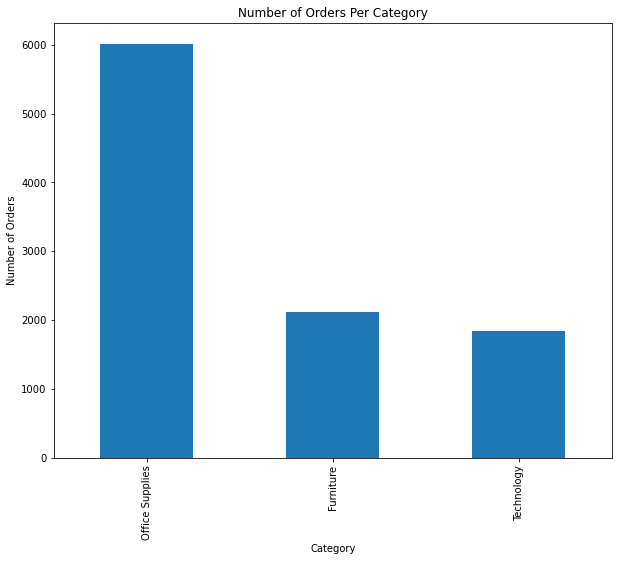

In [80]:
df['category'].value_counts().plot.bar(figsize=(10,8)).set(
    title='Number of Orders Per Category',
    xlabel='Category',
    ylabel='Number of Orders'
)

In [91]:
df.groupby('sub-category')['profit_per_unit'].median().sort_values(ascending=False)

sub-category
Copiers        150.49725
Machines        14.95600
Phones           8.33940
Accessories      6.57860
Appliances       5.31280
Chairs           4.89900
Envelopes        3.91330
Paper            3.11040
Storage          2.93540
Furnishings      2.91240
Labels           1.73430
Binders          1.39780
Supplies         1.25100
Bookcases        1.23470
Art              1.06020
Fasteners        0.89380
Tables         -13.17060
Name: profit_per_unit, dtype: float64

Copiers has highest median `profit_per_unit` and Tables has lowest median

In [97]:
# Applying two conditions to filter the dataframe
# sub-category is equal to tables
# profit_per_unit is negative (less than 0)

table_order_neg_profit = len(df[(df['sub-category'] == 'Tables') & (df['profit_per_unit'] < 0)])
table_order_neg_profit

203

In [100]:
total_table_orders = len(df[df['sub-category'] == 'Tables'])

In [102]:
percent_negative_table_orders = round((table_order_neg_profit / total_table_orders) * 100, 2)
percent_negative_table_orders

63.64

### When to sell *what*?

- Using the [datetime functionality](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html) of `order_date`, create a `month` column
- Create a bar plot showing the median profit of each `category` for each `month` of the year
- There is one `category` which consistently has the highest median profit. Create a new DataFrame of only these orders.
- Show the *total* profit for every `sub-category` of tech for each month of the year. What should the Superstore be selling when?

In [103]:
# Your code here
df.head()

,order_id,order_date,ship_date,ship_mode,product_id,customer_id,sales,quantity,discount,profit,segment,country,city,state,postal_code,region,product_name,category,sub-category,profit_per_unit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,FUR-BO-10001798,CG-12520,261.9600,2,0.00,41.9136,Consumer,United States,Henderson,Kentucky,42420.0,South,Bush Somerset Collection Bookcase,Furniture,Bookcases,20.9568
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,FUR-CH-10000454,CG-12520,731.9400,3,0.00,219.5820,Consumer,United States,Henderson,Kentucky,42420.0,South,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,73.1940
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,OFF-LA-10000240,DV-13045,14.6200,2,0.00,6.8714,Corporate,United States,Los Angeles,California,90036.0,West,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels,3.4357
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,FUR-TA-10000577,SO-20335,957.5775,5,0.45,-383.0310,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,-76.6062
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,OFF-ST-10000760,SO-20335,22.3680,2,0.20,2.5164,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Eldon Fold 'N Roll Cart System,Office Supplies,Storage,1.2582


In [107]:
# datetime_series.dt.month

df['month'] = df['order_date'].dt.month

In [123]:
# Show median profit for each category for each month
df.groupby(['month', 'category']).median()

sales  quantity  discount    profit  postal_code  \
month category                                                                
1     Furniture        163.75400         3     0.125   6.09180      48270.5   
      Office Supplies   25.03000         3     0.000   6.60690      55407.0   
      Technology       164.99000         3     0.200  13.30080      48180.0   
2     Furniture        135.80000         3     0.200   7.15920      77070.0   
      Office Supplies   28.03200         3     0.000   7.20000      63116.0   
      Technology       137.46000         3     0.000  24.27150      53175.5   
3     Furniture        201.05840         3     0.200   6.35555      51732.0   
      Office Supplies   29.76000         3     0.000   7.68000      48185.0   
      Technology       170.24000         3     0.200  22.67820      55407.0   
4     Furniture        187.76000         3     0.200   6.41760      55901.0   
      Office Supplies   25.95500         3     0.200   5.59250      60505.0   
      Technology       159.98000         3     0.200  32.92500      53711.0   
5     Furniture        156.18400         3     0.200   6.78080      60201.0   
      Office Supplies   27.79000         3     0.000   7.08000      56502.0   
      Technology       181.83000         3     0.200  26.10270      60610.0   
6     Furniture        197.37200         3     0.200   6.70080      60610.0   
      Office Supplies   28.40000         3     0.000   7.19280      55106.0   
      Technology       167.92800         3     0.200  22.61700      48181.5   
7     Furniture        190.21400         3     0.200  10.33560      44312.0   
      Office Supplies   23.16800         3     0.000   6.03000      44240.0   
      Technology       236.47500         3     0.200  37.25715      48714.0   
8     Furniture        178.71525         3     0.200   9.19360      53755.5   
      Office Supplies   29.50200         3     0.200   8.49270      48454.0   
      Technology       179.97000         3     0.200  27.29520      53142.0   
9     Furniture        171.45000         3     0.150   8.38640      55407.0   
      Office Supplies   25.04600         3     0.000   6.66640      60163.5   
      Technology       159.98000         3     0.000  27.11240      61113.5   
10    Furniture        165.04800         3     0.200   5.14080      55016.0   
      Office Supplies   27.39600         3     0.000   7.00960      61604.0   
      Technology       148.48000         3     0.200  20.15790      60462.0   
11    Furniture        191.05800         3     0.200   9.55710      60610.0   
      Office Supplies   29.55600         3     0.000   7.02180      60610.0   
      Technology       160.00000         3     0.200  23.51160      60653.0   
12    Furniture        188.55200         3     0.200   9.17640      60076.0   
      Office Supplies   30.34400         3     0.000   7.45335      55901.0   
      Technology       164.38800         3     0.200  25.59680      48307.0   

                       profit_per_unit  
month category                          
1     Furniture                1.80290  
      Office Supplies          2.56810  
      Technology               6.64810  
2     Furniture                2.76640  
      Office Supplies          2.40590  
      Technology               8.33940  
3     Furniture                1.73505  
      Office Supplies          2.53500  
      Technology               6.99860  
4     Furniture                2.13120  
      Office Supplies          1.81440  
      Technology               7.99900  
5     Furniture                1.83525  
      Office Supplies          2.15950  
      Technology               8.16920  
6     Furniture                2.16480  
      Office Supplies          2.21560  
      Technology               7.50835  
7     Furniture                3.40680  
      Office Supplies          1.87050  
      Technology               8.87640  
8     Furniture                3.23240  
      Office Supplies          2.37600  

<AxesSubplot:xlabel='month'>

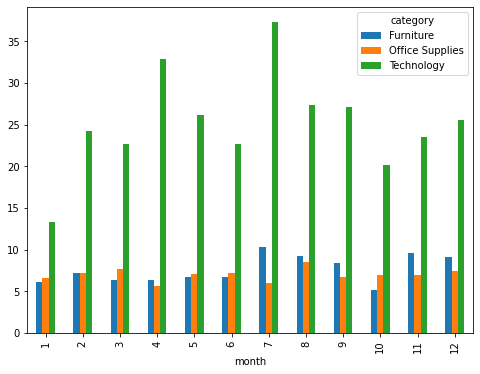

In [125]:
pd.pivot_table(df, index='month', columns='category', values='profit', aggfunc='median').plot.bar(figsize=(8, 6))

In [126]:
tech = df[df['category'] == 'Technology']
tech.head()

,order_id,order_date,ship_date,ship_mode,product_id,customer_id,sales,quantity,discount,profit,...,country,city,state,postal_code,region,product_name,category,sub-category,profit_per_unit,month
7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,TEC-PH-10002275,BH-11710,907.152,6,0.2,90.7152,...,United States,Los Angeles,California,90032.0,West,Mitel 5320 IP Phone VoIP phone,Technology,Phones,15.1192,6
11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,TEC-PH-10002033,BH-11710,911.424,4,0.2,68.3568,...,United States,Los Angeles,California,90032.0,West,Konftel 250 Conference phone - Charcoal black,Technology,Phones,17.0892,6
19,CA-2014-143336,2014-08-27,2014-09-01,Second Class,TEC-PH-10001949,ZD-21925,213.480,3,0.2,16.0110,...,United States,San Francisco,California,94109.0,West,Cisco SPA 501G IP Phone,Technology,Phones,5.3370,8
26,CA-2016-121755,2016-01-16,2016-01-20,Second Class,TEC-AC-10003027,EH-13945,90.570,3,0.0,11.7741,...,United States,Los Angeles,California,90049.0,West,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,Technology,Accessories,3.9247,1
35,CA-2016-117590,2016-12-08,2016-12-10,First Class,TEC-PH-10004977,GH-14485,1097.544,7,0.2,123.4737,...,United States,Richardson,Texas,75080.0,Central,GE 30524EE4,Technology,Phones,17.6391,12


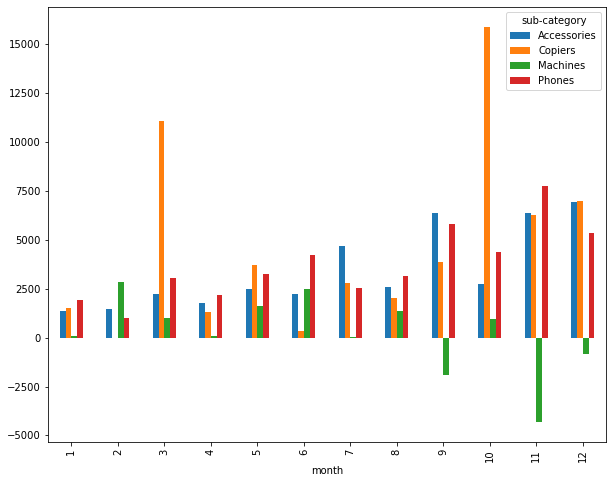

In [128]:
pd.pivot_table(tech, index='month', columns='sub-category', values='profit', aggfunc='sum').plot.bar(figsize=(10,8));